In [497]:
%run "curve_fit_.ipynb"
%run "data_processing_.ipynb"
%run "evaluation_functions_.ipynb"
%run "fitting_functions_.ipynb"
%run "get_temperature_.ipynb"
%run "load_data_.ipynb"
%run "get_backbround_average_.ipynb"
%run "frame_vs_temperature.ipynb"

# Input Files

### input needed: name of the folder containing different velocity's picture

In [498]:
folder = "/Users/chiaentsai/Box/MURI-SARA/Thermoreflectance/Joanne/11092022_1"
folder_2 = "/Users/chiaentsai/Box/MURI-SARA/Thermoreflectance/Joanne/11092022_2"
folder_3 = "/Users/chiaentsai/Box/MURI-SARA/Thermoreflectance/Joanne/11092022_3"
folder_4 = "/Users/chiaentsai/Box/MURI-SARA/Thermoreflectance/Joanne/11092022_4"

In [499]:
all_files, fivemm_files, velocity_path_list, velocity_list, used_frame_num = get_needed_files(folder)
back_intensity_list = get_background_average(fivemm_files)
power_list = get_powers(all_files)

In [500]:
all_files_2, fivemm_files_2, velocity_path_list_2, velocity_list_2, used_frame_num_2 = get_needed_files(folder_2)
back_intensity_list_2 = get_background_average(fivemm_files_2)
power_list_2 = get_powers(all_files_2)

In [501]:
all_files_3, fivemm_files_3, velocity_path_list_3, velocity_list_3, used_frame_num_3 = get_needed_files(folder_3)
back_intensity_list_3 = get_background_average(fivemm_files_3)
power_list_3 = get_powers(all_files_3)

In [502]:
all_files_4, fivemm_files_4, velocity_path_list_4, velocity_list_4, used_frame_num_4 = get_needed_files(folder_4)
back_intensity_list_4 = get_background_average(fivemm_files_4)
power_list_4 = get_powers(all_files_4)

# Get kappa (gold melt)

### input needed: gold melting power at specific velocity 

In [267]:
gold_list = ['103', '155', '20', '45', '68', '9']

gold_melting_W = {
    '103': 54,
    '155': 58,
    '20': 45,
    '45': 49.5,
    '68': 52,
    '9': 42.5
}

/Users/chiaentsai/.virtualenvs/venv/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


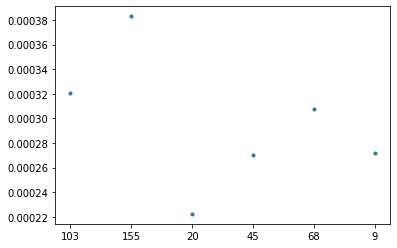

In [333]:
Dict_gold = dict((k, fivemm_files[k][10:]) for k in gold_list)
back_intensity_list_gold = []
for key in fivemm_files:
    if key in gold_list:
        index = list(fivemm_files).index(key)
        back_intensity_list_gold.append(back_intensity_list[index])

#Dict_dRoverR = dict.fromkeys(list(Dict_gold.keys()),[])
dRoverR = []
for i, v in enumerate(list(Dict_gold.keys())):
    con = []
    for file in Dict_gold[v]:
        val = get_peak_dRoverR(file, back_intensity_list_gold[i], two_lorentz, two_lorentz)
        con.append(val)
    dRoverR.append(con)

power_gold = []
for i, (key, value) in enumerate(fivemm_files.items()):
    if key in gold_list:
        power_gold.append(power_list[i][1:])

for i, v in enumerate(list(Dict_gold.keys())):
    plt.plot(power_gold[i][:-1], dRoverR[i][:-1], '.')
    plt.xlabel("power")
    plt.ylabel("dR/R")
    plt.savefig("/Users/chiaentsai/Desktop/lab/Temperature_Calibration/gold_dRoverR_figure/{}mm.png".format(v), format="PNG")
    plt.close()

kappa_gold = []
for i, v in enumerate(list(Dict_gold.keys())):
    power = [float(j) for j in power_gold[i]][:-1]
    y = dRoverR[i][:-1]
    popt, pcov = curve_fit(expo, power, y, p0 = [1, 0.0000005, 1], maxfev = 8000)
    #a, b, c = popt
    plt.plot(power, y, '.')
    y_pred = [expo(j, *popt) for j in power]
    plt.plot(power, y_pred)
    plt.xlabel("power")
    plt.ylabel("dR/R")
    plt.savefig("/Users/chiaentsai/Desktop/lab/Temperature_Calibration/gold_dRoverR_fit_figure/{}mm.png".format(v), format="PNG")
    plt.close()
    f = expo(gold_melting_W[v], *popt)
    gold_m = 1064
    dT = gold_m - 21
    kappa = f / dT
    kappa_gold.append(kappa)
    
Dict_kappa_gold = dict(zip(list(Dict_gold.keys()),kappa_gold))

plt.plot(list(Dict_gold.keys()), kappa_gold, '.')
plt.savefig("/Users/chiaentsai/Desktop/lab/Temperature_Calibration/kappa.png", format="PNG")

In [334]:
avg_kappa_gold = sum(kappa_gold) / len(kappa_gold)
avg_kappa_gold

0.00029587259077126993

### Data set 2

/Users/chiaentsai/.virtualenvs/venv/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


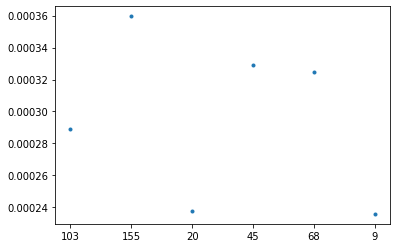

In [341]:
Dict_gold = dict((k, fivemm_files_2[k][10:]) for k in gold_list)
back_intensity_list_gold = []
for key in fivemm_files_2:
    if key in gold_list:
        index = list(fivemm_files_2).index(key)
        back_intensity_list_gold.append(back_intensity_list_2[index])

#Dict_dRoverR = dict.fromkeys(list(Dict_gold.keys()),[])
dRoverR = []
for i, v in enumerate(list(Dict_gold.keys())):
    con = []
    for file in Dict_gold[v]:
        val = get_peak_dRoverR(file, back_intensity_list_gold[i], two_lorentz, two_lorentz)
        con.append(val)
    dRoverR.append(con)

power_gold = []
for i, (key, value) in enumerate(fivemm_files_2.items()):
    if key in gold_list:
        power_gold.append(power_list_2[i][1:])

for i, v in enumerate(list(Dict_gold.keys())):
    plt.plot(power_gold[i][:-1], dRoverR[i][:-1], '.')
    plt.xlabel("power")
    plt.ylabel("dR/R")
    plt.savefig("/Users/chiaentsai/Desktop/lab/Temperature_Calibration/gold_dRoverR_figure_2/{}mm.png".format(v), format="PNG")
    plt.close()

kappa_gold = []
for i, v in enumerate(list(Dict_gold.keys())):
    power = [float(j) for j in power_gold[i]][:-1]
    y = dRoverR[i][:-1]
    popt, pcov = curve_fit(expo, power, y, p0 = [1, 0.0000003, 1], maxfev = 8000)
    #a, b, c = popt
    plt.plot(power, y, '.')
    y_pred = [expo(j, *popt) for j in power]
    plt.plot(power, y_pred)
    plt.xlabel("power")
    plt.ylabel("dR/R")
    plt.savefig("/Users/chiaentsai/Desktop/lab/Temperature_Calibration/gold_dRoverR_fit_figure_2/{}mm.png".format(v), format="PNG")
    plt.close()
    f = expo(gold_melting_W[v], *popt)
    gold_m = 1064
    dT = gold_m - 21
    kappa = f / dT
    kappa_gold.append(kappa)
    
Dict_kappa_gold = dict(zip(list(Dict_gold.keys()),kappa_gold))

plt.plot(list(Dict_gold.keys()), kappa_gold, '.')
plt.savefig("/Users/chiaentsai/Desktop/lab/Temperature_Calibration/kappa_2.png", format="PNG")

In [342]:
avg_kappa_gold = sum(kappa_gold) / len(kappa_gold)
avg_kappa_gold

0.0002960298187278029

### Data set 3

/Users/chiaentsai/.virtualenvs/venv/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


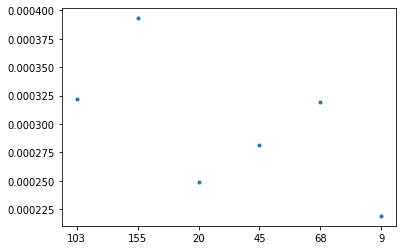

In [339]:
Dict_gold = dict((k, fivemm_files_3[k][10:]) for k in gold_list)
back_intensity_list_gold = []
for key in fivemm_files_3:
    if key in gold_list:
        index = list(fivemm_files_3).index(key)
        back_intensity_list_gold.append(back_intensity_list_3[index])

#Dict_dRoverR = dict.fromkeys(list(Dict_gold.keys()),[])
dRoverR = []
for i, v in enumerate(list(Dict_gold.keys())):
    con = []
    for file in Dict_gold[v]:
        val = get_peak_dRoverR(file, back_intensity_list_gold[i], two_lorentz, two_lorentz)
        con.append(val)
    dRoverR.append(con)

power_gold = []
for i, (key, value) in enumerate(fivemm_files_3.items()):
    if key in gold_list:
        power_gold.append(power_list_3[i][1:])

for i, v in enumerate(list(Dict_gold.keys())):
    plt.plot(power_gold[i][:-1], dRoverR[i][:-1], '.')
    plt.xlabel("power")
    plt.ylabel("dR/R")
    plt.savefig("/Users/chiaentsai/Desktop/lab/Temperature_Calibration/gold_dRoverR_figure_3/{}mm.png".format(v), format="PNG")
    plt.close()

kappa_gold = []
for i, v in enumerate(list(Dict_gold.keys())):
    power = [float(j) for j in power_gold[i]][:-1]
    y = dRoverR[i][:-1]
    popt, pcov = curve_fit(expo, power, y, p0 = [1, 0.0000005, 1], maxfev = 8000)
    #a, b, c = popt
    plt.plot(power, y, '.')
    y_pred = [expo(j, *popt) for j in power]
    plt.plot(power, y_pred)
    plt.xlabel("power")
    plt.ylabel("dR/R")
    plt.savefig("/Users/chiaentsai/Desktop/lab/Temperature_Calibration/gold_dRoverR_fit_figure_3/{}mm.png".format(v), format="PNG")
    plt.close()
    f = expo(gold_melting_W[v], *popt)
    gold_m = 1064
    dT = gold_m - 21
    kappa = f / dT
    kappa_gold.append(kappa)
    
Dict_kappa_gold = dict(zip(list(Dict_gold.keys()),kappa_gold))

plt.plot(list(Dict_gold.keys()), kappa_gold, '.')
plt.savefig("/Users/chiaentsai/Desktop/lab/Temperature_Calibration/kappa_3.png", format="PNG")


In [340]:
avg_kappa_gold = sum(kappa_gold) / len(kappa_gold)
avg_kappa_gold


0.0002971801453280994

### Data set 4

/Users/chiaentsai/.virtualenvs/venv/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


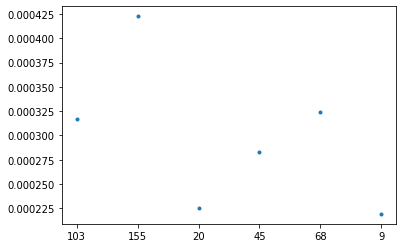

In [297]:
Dict_gold = dict((k, fivemm_files_4[k][10:]) for k in gold_list)
back_intensity_list_gold = []
for key in fivemm_files_4:
    if key in gold_list:
        index = list(fivemm_files_4).index(key)
        back_intensity_list_gold.append(back_intensity_list_4[index])

#Dict_dRoverR = dict.fromkeys(list(Dict_gold.keys()),[])
dRoverR = []
for i, v in enumerate(list(Dict_gold.keys())):
    con = []
    for file in Dict_gold[v]:
        val = get_peak_dRoverR(file, back_intensity_list_gold[i], two_lorentz, two_lorentz)
        con.append(val)
    dRoverR.append(con)

power_gold = []
for i, (key, value) in enumerate(fivemm_files_4.items()):
    if key in gold_list:
        power_gold.append(power_list_4[i][1:])

for i, v in enumerate(list(Dict_gold.keys())):
    plt.plot(power_gold[i][:-1], dRoverR[i][:-1], '.')
    plt.xlabel("power")
    plt.ylabel("dR/R")
    plt.savefig("/Users/chiaentsai/Desktop/lab/Temperature_Calibration/gold_dRoverR_figure_4/{}mm.png".format(v), format="PNG")
    plt.close()

kappa_gold = []
for i, v in enumerate(list(Dict_gold.keys())):
    power = [float(j) for j in power_gold[i]][:-1]
    y = dRoverR[i][:-1]
    popt, pcov = curve_fit(expo, power, y, p0 = [1, 0.0000005, 1], maxfev = 8000)
    #a, b, c = popt
    plt.plot(power, y, '.')
    y_pred = [expo(j, *popt) for j in power]
    plt.plot(power, y_pred)
    plt.xlabel("power")
    plt.ylabel("dR/R")
    plt.savefig("/Users/chiaentsai/Desktop/lab/Temperature_Calibration/gold_dRoverR_fit_figure_4/{}mm.png".format(v), format="PNG")
    plt.close()
    f = expo(gold_melting_W[v], *popt)
    gold_m = 1064
    dT = gold_m - 21
    kappa = f / dT
    kappa_gold.append(kappa)
    
Dict_kappa_gold = dict(zip(list(Dict_gold.keys()),kappa_gold))

plt.plot(list(Dict_gold.keys()), kappa_gold, '.')
plt.savefig("/Users/chiaentsai/Desktop/lab/Temperature_Calibration/kappa_4.png", format="PNG")

In [298]:
avg_kappa_gold = sum(kappa_gold) / len(kappa_gold)
avg_kappa_gold

0.00029856970491947966

### use average dR/R

In [369]:
Dict_gold_1 = dict((k, fivemm_files[k][10:]) for k in gold_list)
Dict_gold_2 = dict((k, fivemm_files_2[k][10:]) for k in gold_list)
Dict_gold_3 = dict((k, fivemm_files_3[k][10:]) for k in gold_list)
Dict_gold_4 = dict((k, fivemm_files_4[k][10:]) for k in gold_list)

back_intensity_list_gold_1 = []
back_intensity_list_gold_2 = []
back_intensity_list_gold_3 = []
back_intensity_list_gold_4 = []

for key in fivemm_files:
    if key in gold_list:
        index = list(fivemm_files).index(key)
        back_intensity_list_gold_1.append(back_intensity_list[index])
for key in fivemm_files_2:
    if key in gold_list:
        index = list(fivemm_files_2).index(key)
        back_intensity_list_gold_2.append(back_intensity_list_2[index])
for key in fivemm_files_3:
    if key in gold_list:
        index = list(fivemm_files_3).index(key)
        back_intensity_list_gold_3.append(back_intensity_list_3[index])
for key in fivemm_files_4:
    if key in gold_list:
        index = list(fivemm_files_4).index(key)
        back_intensity_list_gold_4.append(back_intensity_list_4[index])

dRoverR_1 = []
dRoverR_2 = []
dRoverR_3 = []
dRoverR_4 = []

for i, v in enumerate(list(Dict_gold_1.keys())):
    con = []
    for file in Dict_gold_1[v]:
        val = get_peak_dRoverR(file, back_intensity_list_gold_1[i], two_lorentz, two_lorentz)
        con.append(val)
    dRoverR_1.append(con)

for i, v in enumerate(list(Dict_gold_2.keys())):
    con = []
    for file in Dict_gold_2[v]:
        val = get_peak_dRoverR(file, back_intensity_list_gold_2[i], two_lorentz, two_lorentz)
        con.append(val)
    dRoverR_2.append(con)

for i, v in enumerate(list(Dict_gold_3.keys())):
    con = []
    for file in Dict_gold_3[v]:
        val = get_peak_dRoverR(file, back_intensity_list_gold_3[i], two_lorentz, two_lorentz)
        con.append(val)
    dRoverR_3.append(con)

for i, v in enumerate(list(Dict_gold_4.keys())):
    con = []
    for file in Dict_gold_4[v]:
        val = get_peak_dRoverR(file, back_intensity_list_gold_4[i], two_lorentz, two_lorentz)
        con.append(val)
    dRoverR_4.append(con)


/Users/chiaentsai/.virtualenvs/venv/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [378]:
for i in range(0,len(dRoverR_1),1):
    dRoverR_1[i] = dRoverR_1[i][:-1]

for i in range(0,len(dRoverR_2),1):
    dRoverR_2[i] = dRoverR_2[i][:-1]

for i in range(0,len(dRoverR_3),1):
    dRoverR_3[i] = dRoverR_3[i][:-1]

for i in range(0,len(dRoverR_4),1):
    dRoverR_4[i] = dRoverR_4[i][:-1]

In [385]:
dRoverR_2[1] = dRoverR_2[1][:-1]
dRoverR_1[2] = dRoverR_1[2][:-1]
dRoverR_1[3] = dRoverR_1[3][:-1]
dRoverR_3[3] = dRoverR_3[3][:-1]
dRoverR_4[3] = dRoverR_4[3][:-1]
dRoverR_1[4] = dRoverR_1[4][:-1]
dRoverR_3[4] = dRoverR_3[4][:-1]
dRoverR_4[4] = dRoverR_4[4][:-1]
dRoverR_1[5] = dRoverR_1[5][:-1]

In [414]:
power_gold = [[],[],[],[],[],[]]
power_gold[0] = [29+2*i for i in range(0,11,1)]
power_gold[1] = [29+2*i for i in range(0,12,1)]
power_gold[2] = [29+2*i for i in range(0,7,1)]
power_gold[3] = [29+2*i for i in range(0,8,1)]
power_gold[4] = [29+2*i for i in range(0,9,1)]
power_gold[5] = [29+2*i for i in range(0,6,1)]

In [422]:
avg_dRoverR = [[],[],[],[],[],[]]
for i in range(0,6,1):
    arrays = [dRoverR_1[i], dRoverR_2[i], dRoverR_3[i], dRoverR_4[i]]
    avg_dRoverR[i] = [np.mean(k) for k in zip(*arrays)]

In [423]:
for i, v in enumerate(list(Dict_gold_1.keys())):
    plt.plot(power_gold[i], avg_dRoverR[i], '.')
    plt.xlabel("power")
    plt.ylabel("dR/R")
    plt.savefig("/Users/chiaentsai/Desktop/lab/Temperature_Calibration/gold_dRoverR_figure_avg/{}mm.png".format(v), format="PNG")
    plt.close()

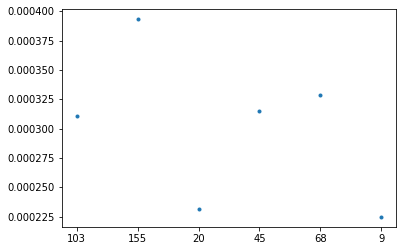

In [425]:
kappa_gold_avg = []
for i, v in enumerate(list(Dict_gold_1.keys())):
    popt, pcov = curve_fit(expo, power_gold[i], avg_dRoverR[i], p0 = [1, 0.0000005, 1], maxfev = 8000)
    #a, b, c = popt
    plt.plot(power_gold[i], avg_dRoverR[i], '.')
    y_pred = [expo(j, *popt) for j in power_gold[i]]
    plt.plot(power_gold[i], y_pred)
    plt.xlabel("power")
    plt.ylabel("dR/R")
    plt.savefig("/Users/chiaentsai/Desktop/lab/Temperature_Calibration/gold_dRoverR_fit_figure_avg/{}mm.png".format(v), format="PNG")
    plt.close()
    f = expo(gold_melting_W[v], *popt)
    gold_m = 1064
    dT = gold_m - 21
    kappa = f / dT
    kappa_gold_avg.append(kappa)
    
#Dict_kappa_gold = dict(zip(list(Dict_gold.keys()),kappa_gold))

plt.plot(list(Dict_gold_1.keys()), kappa_gold_avg, '.')
plt.savefig("/Users/chiaentsai/Desktop/lab/Temperature_Calibration/kappa_avg.png", format="PNG")

# Get kappa (silicon melt)

### input need: si melting power at specific velocity

### Data set 1

In [496]:
Si_list = ['103', '20', '234', '68', '9']
Si_melting_W = {
    '103': 51,
    '20': 45,
    '234': 57,
    '68': 49,
    '9': 43
}

Dict_Si = dict((k, fivemm_files[k][10:]) for k in Si_list)
back_intensity_list_Si = []
for key in fivemm_files:
    if key in Si_list:
        index = list(fivemm_files).index(key)
        back_intensity_list_Si.append(back_intensity_list[index])

#Dict_dRoverR = dict.fromkeys(list(Dict_gold.keys()),[])
dRoverR = []
for i, v in enumerate(list(Dict_Si.keys())):
    con = []
    for file in Dict_Si[v]:
        val = get_peak_dRoverR(file, back_intensity_list_Si[i], two_lorentz, two_lorentz)
        con.append(val)
    dRoverR.append(con)

power_Si = []
for i, (key, value) in enumerate(fivemm_files.items()):
    if key in Si_list:
        power_Si.append(power_list[i][1:])

for i, v in enumerate(list(Dict_Si.keys())):
    plt.plot(power_Si[i][:-1], dRoverR[i][:-1], '.')
    plt.xlabel("power")
    plt.ylabel("dR/R")
    plt.savefig("/Users/chiaentsai/Desktop/lab/Temperature_Calibration/Si_dRoverR_figure/{}mm.png".format(v), format="PNG")
    plt.close()

kappa_Si = []
for i, v in enumerate(list(Dict_Si.keys())):
    power = [float(j) for j in power_Si[i]][:-1]
    y = dRoverR[i][:-1]
    popt, pcov = curve_fit(expo, power, y, p0 = [1, 0.00000005, 1], maxfev = 8000)
    #a, b, c = popt
    plt.plot(power, y, '.')
    y_pred = [expo(j, *popt) for j in power]
    plt.plot(power, y_pred)
    plt.xlabel("power")
    plt.ylabel("dR/R")
    plt.savefig("/Users/chiaentsai/Desktop/lab/Temperature_Calibration/Si_dRoverR_fit_figure/{}mm.png".format(v), format="PNG")
    plt.close()
    f = expo(Si_melting_W[v], *popt)
    Si_m = 1410
    dT = Si_m - 21
    kappa = f / dT
    kappa_Si.append(kappa)
    
Dict_kappa_Si = dict(zip(list(Dict_Si.keys()),kappa_Si))

plt.plot(list(Dict_Si.keys()), kappa_Si, '.')
plt.savefig("/Users/chiaentsai/Desktop/lab/Temperature_Calibration/kappa_Si.png", format="PNG")

avg_kappa_Si = sum(kappa_Si) / len(kappa_Si)
avg_kappa_Si

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 1000000.

### Data set 2

/Users/chiaentsai/.virtualenvs/venv/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


0.00016955286988761616

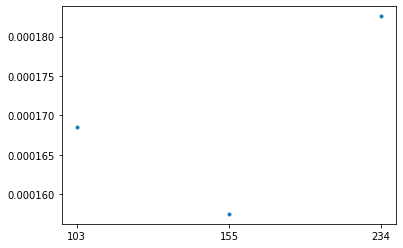

In [ ]:
Si_list = ['103', '155', '234']
Si_melting_W = {
    '103': 51,
    '155': 55,
    '234': 57
}

Dict_Si = dict((k, fivemm_files_2[k][10:]) for k in Si_list)
back_intensity_list_Si = []
for key in fivemm_files_2:
    if key in Si_list:
        index = list(fivemm_files_2).index(key)
        back_intensity_list_Si.append(back_intensity_list_2[index])

#Dict_dRoverR = dict.fromkeys(list(Dict_gold.keys()),[])
dRoverR = []
for i, v in enumerate(list(Dict_Si.keys())):
    con = []
    for file in Dict_Si[v]:
        val = get_peak_dRoverR(file, back_intensity_list_Si[i], two_lorentz, two_lorentz)
        con.append(val)
    dRoverR.append(con)

power_Si = []
for i, (key, value) in enumerate(fivemm_files_2.items()):
    if key in Si_list:
        power_Si.append(power_list_2[i][1:])

for i, v in enumerate(list(Dict_Si.keys())):
    plt.plot(power_Si[i][:-1], dRoverR[i][:-1], '.')
    plt.xlabel("power")
    plt.ylabel("dR/R")
    plt.savefig("/Users/chiaentsai/Desktop/lab/Temperature_Calibration/Si_dRoverR_figure_2/{}mm.png".format(v), format="PNG")
    plt.close()

kappa_Si = []
for i, v in enumerate(list(Dict_Si.keys())):
    power = [float(j) for j in power_Si[i]][:-1]
    y = dRoverR[i][:-1]
    popt, pcov = curve_fit(expo, power, y, p0 = [1, 0.0000005, 1], maxfev = 8000)
    #a, b, c = popt
    plt.plot(power, y, '.')
    y_pred = [expo(j, *popt) for j in power]
    plt.plot(power, y_pred)
    plt.xlabel("power")
    plt.ylabel("dR/R")
    plt.savefig("/Users/chiaentsai/Desktop/lab/Temperature_Calibration/Si_dRoverR_fit_figure_2/{}mm.png".format(v), format="PNG")
    plt.close()
    f = expo(Si_melting_W[v], *popt)
    Si_m = 1410
    dT = Si_m - 21
    kappa = f / dT
    kappa_Si.append(kappa)
    
Dict_kappa_Si = dict(zip(list(Dict_Si.keys()),kappa_Si))

plt.plot(list(Dict_Si.keys()), kappa_Si, '.')
plt.savefig("/Users/chiaentsai/Desktop/lab/Temperature_Calibration/kappa_Si_2.png", format="PNG")

avg_kappa_Si = sum(kappa_Si) / len(kappa_Si)
avg_kappa_Si

### Data set 3

/Users/chiaentsai/.virtualenvs/venv/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


0.00018925322919406717

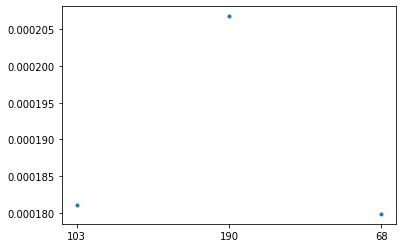

In [ ]:
Si_list = ['103', '190', '68']
Si_melting_W = {
    '103': 51,
    '190': 55,
    '68': 49
}

Dict_Si = dict((k, fivemm_files_3[k][10:]) for k in Si_list)
back_intensity_list_Si = []
for key in fivemm_files_3:
    if key in Si_list:
        index = list(fivemm_files_3).index(key)
        back_intensity_list_Si.append(back_intensity_list_3[index])

#Dict_dRoverR = dict.fromkeys(list(Dict_gold.keys()),[])
dRoverR = []
for i, v in enumerate(list(Dict_Si.keys())):
    con = []
    for file in Dict_Si[v]:
        val = get_peak_dRoverR(file, back_intensity_list_Si[i], two_lorentz, two_lorentz)
        con.append(val)
    dRoverR.append(con)

power_Si = []
for i, (key, value) in enumerate(fivemm_files_3.items()):
    if key in Si_list:
        power_Si.append(power_list_3[i][1:])

for i, v in enumerate(list(Dict_Si.keys())):
    plt.plot(power_Si[i][:-1], dRoverR[i][:-1], '.')
    plt.xlabel("power")
    plt.ylabel("dR/R")
    plt.savefig("/Users/chiaentsai/Desktop/lab/Temperature_Calibration/Si_dRoverR_figure_3/{}mm.png".format(v), format="PNG")
    plt.close()

kappa_Si = []
for i, v in enumerate(list(Dict_Si.keys())):
    power = [float(j) for j in power_Si[i]][:-1]
    y = dRoverR[i][:-1]
    popt, pcov = curve_fit(expo, power, y, p0 = [1, 0.000005, 1], maxfev = 8000)
    #a, b, c = popt
    plt.plot(power, y, '.')
    y_pred = [expo(j, *popt) for j in power]
    plt.plot(power, y_pred)
    plt.xlabel("power")
    plt.ylabel("dR/R")
    plt.savefig("/Users/chiaentsai/Desktop/lab/Temperature_Calibration/Si_dRoverR_fit_figure_3/{}mm.png".format(v), format="PNG")
    plt.close()
    f = expo(Si_melting_W[v], *popt)
    Si_m = 1410
    dT = Si_m - 21
    kappa = f / dT
    kappa_Si.append(kappa)
    
Dict_kappa_Si = dict(zip(list(Dict_Si.keys()),kappa_Si))

plt.plot(list(Dict_Si.keys()), kappa_Si, '.')
plt.savefig("/Users/chiaentsai/Desktop/lab/Temperature_Calibration/kappa_Si_3.png", format="PNG")

avg_kappa_Si = sum(kappa_Si) / len(kappa_Si)
avg_kappa_Si

### Data set 4

/Users/chiaentsai/.virtualenvs/venv/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


0.0001828065343291713

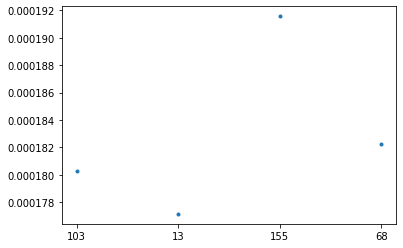

In [ ]:
Si_list = ['103', '13', '155', '68']
Si_melting_W = {
    '103': 51,
    '13': 43,
    '155': 53,
    '68': 49
}

Dict_Si = dict((k, fivemm_files_4[k][10:]) for k in Si_list)
back_intensity_list_Si = []
for key in fivemm_files_4:
    if key in Si_list:
        index = list(fivemm_files_4).index(key)
        back_intensity_list_Si.append(back_intensity_list_4[index])

#Dict_dRoverR = dict.fromkeys(list(Dict_gold.keys()),[])
dRoverR = []
for i, v in enumerate(list(Dict_Si.keys())):
    con = []
    for file in Dict_Si[v]:
        val = get_peak_dRoverR(file, back_intensity_list_Si[i], two_lorentz, two_lorentz)
        con.append(val)
    dRoverR.append(con)

power_Si = []
for i, (key, value) in enumerate(fivemm_files_4.items()):
    if key in Si_list:
        power_Si.append(power_list_4[i][1:])

for i, v in enumerate(list(Dict_Si.keys())):
    plt.plot(power_Si[i][:-1], dRoverR[i][:-1], '.')
    plt.xlabel("power")
    plt.ylabel("dR/R")
    plt.savefig("/Users/chiaentsai/Desktop/lab/Temperature_Calibration/Si_dRoverR_figure_4/{}mm.png".format(v), format="PNG")
    plt.close()

kappa_Si = []
for i, v in enumerate(list(Dict_Si.keys())):
    power = [float(j) for j in power_Si[i]][:-1]
    y = dRoverR[i][:-1]
    popt, pcov = curve_fit(expo, power, y, p0 = [1, 0.0000005, 1], maxfev = 8000)
    #a, b, c = popt
    plt.plot(power, y, '.')
    y_pred = [expo(j, *popt) for j in power]
    plt.plot(power, y_pred)
    plt.xlabel("power")
    plt.ylabel("dR/R")
    plt.savefig("/Users/chiaentsai/Desktop/lab/Temperature_Calibration/Si_dRoverR_fit_figure_4/{}mm.png".format(v), format="PNG")
    plt.close()
    f = expo(Si_melting_W[v], *popt)
    Si_m = 1410
    dT = Si_m - 21
    kappa = f / dT
    kappa_Si.append(kappa)
    
Dict_kappa_Si = dict(zip(list(Dict_Si.keys()),kappa_Si))

plt.plot(list(Dict_Si.keys()), kappa_Si, '.')
plt.savefig("/Users/chiaentsai/Desktop/lab/Temperature_Calibration/kappa_Si_4.png", format="PNG")

avg_kappa_Si = sum(kappa_Si) / len(kappa_Si)
avg_kappa_Si

### use average dR/R

In [ ]:
Si_list = ['103', '13', '155', '190', '20', '68', '9']
Si_melting_W = {
    '103': 51,
    '13': 43,
    '155': 53,
    '190': 55,
    '20': 45,
    '68': 49,
    '9': 41
}

Dict_Si_1 = dict((k, fivemm_files[k][10:]) for k in Si_list)
Dict_Si_2 = dict((k, fivemm_files_2[k][10:]) for k in Si_list)
Dict_Si_3 = dict((k, fivemm_files_3[k][10:]) for k in Si_list)
#Dict_Si_4 = dict((k, fivemm_files_4[k][10:]) for k in Si_list)

back_intensity_list_Si_1 = []
back_intensity_list_Si_2 = []
back_intensity_list_Si_3 = []
#back_intensity_list_Si_4 = []

for key in fivemm_files:
    if key in Si_list:
        index = list(fivemm_files).index(key)
        back_intensity_list_Si_1.append(back_intensity_list[index])
for key in fivemm_files_2:
    if key in Si_list:
        index = list(fivemm_files_2).index(key)
        back_intensity_list_Si_2.append(back_intensity_list_2[index])
for key in fivemm_files_3:
    if key in Si_list:
        index = list(fivemm_files_3).index(key)
        back_intensity_list_Si_3.append(back_intensity_list_3[index])
#for key in fivemm_files_4:
#    if key in Si_list:
#        index = list(fivemm_files_4).index(key)
#        back_intensity_list_Si_4.append(back_intensity_list_4[index])

dRoverR_1 = []
dRoverR_2 = []
dRoverR_3 = []
#dRoverR_4 = []

for i, v in enumerate(list(Dict_Si_1.keys())):
    con = []
    for file in Dict_Si_1[v]:
        val = get_peak_dRoverR(file, back_intensity_list_Si_1[i], two_lorentz, two_lorentz)
        con.append(val)
    dRoverR_1.append(con)

for i, v in enumerate(list(Dict_Si_2.keys())):
    con = []
    for file in Dict_Si_2[v]:
        val = get_peak_dRoverR(file, back_intensity_list_Si_2[i], two_lorentz, two_lorentz)
        con.append(val)
    dRoverR_2.append(con)

for i, v in enumerate(list(Dict_Si_3.keys())):
    con = []
    for file in Dict_Si_3[v]:
        val = get_peak_dRoverR(file, back_intensity_list_Si_3[i], two_lorentz, two_lorentz)
        con.append(val)
    dRoverR_3.append(con)

#for i, v in enumerate(list(Dict_gold_4.keys())):
#    con = []
#    for file in Dict_gold_4[v]:
#        val = get_peak_dRoverR(file, back_intensity_list_gold_4[i], two_lorentz, two_lorentz)
#        con.append(val)
#    dRoverR_4.append(con)

/Users/chiaentsai/.virtualenvs/venv/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [ ]:
for i in range(0,len(dRoverR_1),1):
    dRoverR_1[i] = dRoverR_1[i][:-1]

for i in range(0,len(dRoverR_2),1):
    dRoverR_2[i] = dRoverR_2[i][:-1]

for i in range(0,len(dRoverR_3),1):
    dRoverR_3[i] = dRoverR_3[i][:-1]

#for i in range(0,len(dRoverR_4),1):
#    dRoverR_4[i] = dRoverR_4[i][:-1]

In [ ]:
dRoverR_2[2] = dRoverR_2[2][:-1]
dRoverR_2[3] = dRoverR_2[3][:-1]
dRoverR_3[3] = dRoverR_3[3][:-1]
dRoverR_1[4] = dRoverR_1[4][:-1]
dRoverR_1[5] = dRoverR_1[5][:-1]
dRoverR_3[5] = dRoverR_3[5][:-1]
dRoverR_1[6] = dRoverR_1[6][:-1]

In [ ]:
power_Si = [[],[],[],[],[],[],[]]
power_Si[0] = [29+2*i for i in range(0,10,1)]
power_Si[1] = [29+2*i for i in range(0,6,1)]
power_Si[2] = [29+2*i for i in range(0,11,1)]
power_Si[3] = [29+2*i for i in range(0,11,1)]
power_Si[4] = [29+2*i for i in range(0,6,1)]
power_Si[5] = [29+2*i for i in range(0,8,1)]
power_Si[6] = [29+2*i for i in range(0,5,1)]

In [ ]:
avg_dRoverR = [[],[],[],[],[],[],[]]
for i in range(0,7,1):
    arrays = [dRoverR_1[i], dRoverR_2[i], dRoverR_3[i]]
    avg_dRoverR[i] = [np.mean(k) for k in zip(*arrays)]

In [ ]:
for i, v in enumerate(list(Dict_Si_1.keys())):
    plt.plot(power_Si[i], avg_dRoverR[i], '.')
    plt.xlabel("power")
    plt.ylabel("dR/R")
    plt.savefig("/Users/chiaentsai/Desktop/lab/Temperature_Calibration/Si_dRoverR_figure_avg/{}mm.png".format(v), format="PNG")
    plt.close()

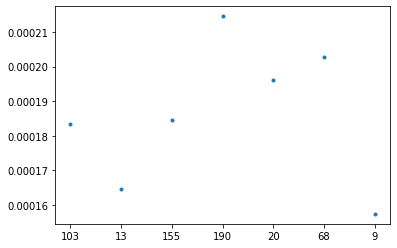

In [ ]:
kappa_Si_avg = []
for i, v in enumerate(list(Dict_Si_1.keys())):
    popt, pcov = curve_fit(expo, power_Si[i], avg_dRoverR[i], p0 = [1, 0.0000005, 1], maxfev = 8000)
    #a, b, c = popt
    plt.plot(power_Si[i], avg_dRoverR[i], '.')
    y_pred = [expo(j, *popt) for j in power_Si[i]]
    plt.plot(power_Si[i], y_pred)
    plt.xlabel("power")
    plt.ylabel("dR/R")
    plt.savefig("/Users/chiaentsai/Desktop/lab/Temperature_Calibration/Si_dRoverR_fit_figure_avg/{}mm.png".format(v), format="PNG")
    plt.close()
    f = expo(Si_melting_W[v], *popt)
    gold_m = 1410
    dT = gold_m - 21
    kappa = f / dT
    kappa_Si_avg.append(kappa)
    
#Dict_kappa_gold = dict(zip(list(Dict_gold.keys()),kappa_gold))

plt.plot(list(Dict_Si_1.keys()), kappa_Si_avg, '.')
plt.savefig("/Users/chiaentsai/Desktop/lab/Temperature_Calibration/kappa_Si_avg.png", format="PNG")

In [ ]:
kappa_Si = sum(kappa_Si_avg)/len(kappa_Si_avg)
kappa_Si

0.00018625705027141445

# Fit plane

In [13]:
Dict_new_fit = {k: Dict_new[k][1:] for k in Dict_new}
Tem = []
for i, v in enumerate(list(Dict_new_fit.keys())):
    tem = []
    for file in Dict_new_fit[v]:
        t = get_peak_T(file, b_files[i], poly5, poly5, avg_kappa_gold)
        tem.append(t)
    Tem.append(tem)

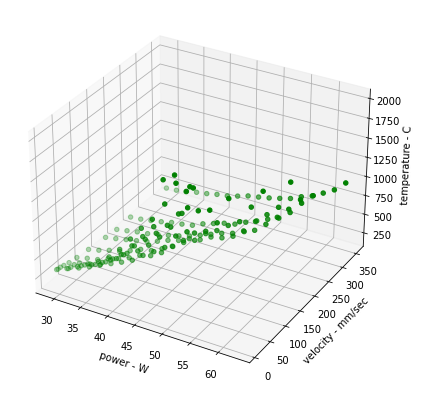

In [14]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
points = []
for i, v in enumerate(list(Dict_new_fit.keys())):
    P = np.linspace(29,29+2*(len(Dict_new_fit[v])-1),(len(Dict_new_fit[v])-1)+1)
    V = [v]*((len(Dict_new_fit[v])-1)+1)
    T = Tem[i]
    ax.scatter3D(P, V, T, color = "green")
    ax.set_xlabel("power - W")
    ax.set_ylabel("velocity - mm/sec")
    ax.set_zlabel("temperature - C")
    point = [list(x) for x in zip(*[P,V,T])]
    points.append(point)
    

/var/folders/f7/kn96xdj93ss0t67sn2q10n6c0000gn/T/ipykernel_8077/1074374514.py:26: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


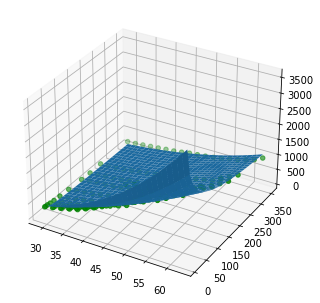

In [15]:
import numpy as np
from scipy.optimize import curve_fit
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
def function(data, a, b, c):
    x = data[0]
    y = data[1]
    return a * (x**b) * (y**c)

x_data = []
y_data = []
z_data = []
for velo in points:
    for item in velo:
        x_data.append(item[0]) # power
        y_data.append(item[1]) # velocity
        z_data.append(item[2]) # temperature
        
parameters, covariance = curve_fit(function, [x_data, y_data], z_data)
model_x_data = np.linspace(min(x_data), max(x_data), 30)
model_y_data = np.linspace(min(y_data), max(y_data), 30)
X, Y = np.meshgrid(model_x_data, model_y_data)
Z = function(np.array([X, Y]), *parameters)
fig = plt.figure()
# setup 3d object
ax = Axes3D(fig)
# plot surface
ax.plot_surface(X, Y, Z)
# plot input data
ax.scatter(x_data, y_data, z_data, color='green')
plt.show()

In [23]:
len(Tem[10])

13